# Analytical\_ML\_v3.ipynb

DOCUMENT OVERVIEW: This document contains code for replicating Figure 3 of Parks
and Goldman (2014). Understanding this document requires familiarity with the
content of the analytic results in the paper.


## Initialization

Import Python packages and intialize data array 'target'.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt


# The 8 columns of 'target' are the 8 possible site patterns which may be
# observed at the three tips of the tree. These correspond to the site pattern
# counts f_{++-}, ..., f_{-+-} in the paper.
target = np.array([[1, 1, -1, -1, 1, 1, -1, -1],
                   [1, 1, -1, -1, -1, -1, 1, 1],
                   [-1, 1, -1, 1, 1, -1, 1, -1]])

## Define ML Functions

COMMENTARY: This section defines the key functions which, for each tree
configuration, compute the relevant ML parameter estimates given the observed
data. These functions implement the formulas derived in the paper; the
parameters estimated are $\tau, \epsilon, \delta, \delta_1$, and $\delta_2$,
depending on the configuration. See the paper for details.

NOTATION: The variables `count_ee`, `count_en`, `count_ne` and `count_nn`
respectively correspond to the variables $f_{=.=}, f_{=,\neq}, f_{\neq,=}$ and
$f_{\neq,\neq}$ defined in the paper. The variables `count_pos` and `count_neg`
correspond respectively to the variables $f_{=}$ and $f_{\neq}$ defined in the
paper.


In [2]:
# CONFIGURATION 1.0
# (θ_A)(θ_B) = τ, θ_C = 0
# 
# input:  freq_vec.shape == (8, 1)
# return: [τ]
def config1_0(freq_vec):  
  count_pos, count_neg = 0, 0
  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1:
      count_pos += freq_vec[i][0]
    else:
      count_neg += freq_vec[i][0]
  opt = [(count_pos - count_neg)/(count_pos + count_neg)]
  return opt, [count_pos, count_neg]

# CONFIGURATION 2.0
# θ_A = 1, θ_B = τ + ε, θ_C = δ
# 
# input:  freq_vec.shape == (8, 1)
# return: [τ + ε, δ]
def config2_0(freq_vec):
  count_ee, count_en, count_ne, count_nn = 0, 0, 0, 0
  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == 1:
      count_ee += freq_vec[i][0]
    elif target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == -1:
      count_en += freq_vec[i][0]
    elif target[0][i] * target[1][i] == -1 and target[0][i] * target[2][i] == 1:
      count_ne += freq_vec[i][0]
    else:
      count_nn += freq_vec[i][0]
  opt = [(count_ee + count_en - count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn)]
  opt.append((count_ee - count_en + count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn))
  return opt, [count_ee, count_en, count_ne, count_nn]

# CONFIGURATION 2.1
# θ_A = τ + ε, θ_B = 1, θ_C = δ
# 
# input:  freq_vec.shape == (8, 1)
# return: [τ + ε, δ]
def config2_1(freq_vec):
  count_ee, count_en, count_ne, count_nn = 0, 0, 0, 0
  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1 and target[1][i] * target[2][i] == 1:
      count_ee += freq_vec[i][0]
    elif target[0][i] * target[1][i] == 1 and target[1][i] * target[2][i] == -1:
      count_en += freq_vec[i][0]
    elif target[0][i] * target[1][i] == -1 and target[1][i] * target[2][i] == 1:
      count_ne += freq_vec[i][0]
    else:
      count_nn += freq_vec[i][0]
  opt = [(count_ee + count_en - count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn)]
  opt.append((count_ee - count_en + count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn))
  return opt, [count_ee, count_en, count_ne, count_nn]

# CONFIGURATION 3.0
# (θ_A)(θ_B) = τ + ε, (θ_A)(θ_C) = δ₁, (θ_B)(θ_C) = δ₂
# 
# input:  freq_vec.shape == (8, 1)
# return: [τ + ε, δ₁, δ₂]
def config3_0(freq_vec):
  count_ee, count_en, count_ne, count_nn = 0, 0, 0, 0
  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == 1:
      count_ee += freq_vec[i][0]
    elif target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == -1:
      count_en += freq_vec[i][0]
    elif target[0][i] * target[1][i] == -1 and target[0][i] * target[2][i] == 1:
      count_ne += freq_vec[i][0]
    else:
      count_nn += freq_vec[i][0]
  opt = [(count_ee + count_en - count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn)]
  p_a = (count_ee - count_en)/(count_ee + count_en + count_ne + count_nn)
  p_b = (count_ne - count_nn)/(count_ee + count_en + count_ne + count_nn)
  p_c = 0.25 * ((2/(1+opt[0]))-(2/(1-opt[0])))
  opt.append(((p_a/(1+opt[0]))-(p_b/(1-opt[0])))/p_c)
  opt.append(((p_a/(1+opt[0]))+(p_b/(1-opt[0])))/p_c)
  return opt, [count_ee, count_en, count_ne, count_nn]

# CONFIGURATION 3.0 (Version 2)
# DOES NOT USE TAYLOR EXPANSION
# (theta_A)(theta_B) = tau + epsilon, (theta_A)(theta_C) = delta_1, (theta_B)(theta_C) = delta_2
# 
# input:  freq_vec.shape == (8, 1)
# return: [tau + epsilon, delta_1, delta_2]
def config3_0v2(freq_vec):
  count_ee, count_en, count_ne, count_nn = 0, 0, 0, 0
  for i in range(0, 8):
    if target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == 1:
      count_ee += freq_vec[i][0]
    elif target[0][i] * target[1][i] == 1 and target[0][i] * target[2][i] == -1:
      count_en += freq_vec[i][0]
    elif target[0][i] * target[1][i] == -1 and target[0][i] * target[2][i] == 1:
      count_ne += freq_vec[i][0]
    else:
      count_nn += freq_vec[i][0]
  k = 1 / (count_en + count_ne + count_nn + count_ee)
  opt = [k * (count_en - count_ne - count_nn + count_ee)]
  opt.append(k * (-count_en + count_ne - count_nn + count_ee))
  opt.append(k * (-count_en - count_ne + count_nn + count_ee))
  return opt, [count_ee, count_en, count_ne, count_nn]

In [3]:
# Determines if the parameters returned by the ML functions are
# valid or not, i.e. all parameters are in the interval [0, 1]
#
# input:  params
# return: boolean
def valid_params(params):
  for k in params:
    if k < 0 or k > 1:
      return False
  if len(params) == 3:
    thetas = []
    thetas.append(np.sqrt(params[0]*params[1]/params[2])) # T_A
    thetas.append(np.sqrt(params[0]*params[2]/params[1])) # T_B
    thetas.append(np.sqrt(params[1]*params[2]/params[0])) # T_C
    for k in thetas:
      if k < 0 or k > 1:
        return False
  return True

# CONFIGURATION 1.0
# Returns negative log-likelihood from parameters and data
def nll_config1_0(params, counts):
  if not valid_params(params):
    return sys.maxsize
  count_pos, count_neg = counts[0], counts[1]
  a = count_pos * np.log((1 / 8.0) * (1 + params[0]))
  b = count_neg * np.log((1 / 8.0) * (1 - params[0]))
  return -1 * (a + b)

# CONFIGURATION 2.0
# Returns negative log-likelihood from parameters and data
def nll_config2_0(params, counts):
  if not valid_params(params):
    return sys.maxsize
  count_ee, count_en, count_ne, count_nn = counts[0], counts[1], counts[2], counts[3]
  a = count_ee * np.log((1 / 8.0) * (1 + params[0] + params[1] + (params[0] * params[1])))
  b = count_en * np.log((1 / 8.0) * (1 + params[0] - params[1] - (params[0] * params[1])))
  c = count_ne * np.log((1 / 8.0) * (1 - params[0] + params[1] - (params[0] * params[1])))
  d = count_nn * np.log((1 / 8.0) * (1 - params[0] - params[1] + (params[0] * params[1])))
  return -1 * (a + b + c + d)

# CONFIGURATION 2.1
# Returns negative log-likelihood from parameters and data
def nll_config2_1(params, counts):
  if not valid_params(params):
    return sys.maxsize
  count_ee, count_en, count_ne, count_nn = counts[0], counts[1], counts[2], counts[3]
  a = count_ee * np.log((1 / 8.0) * (1 + params[0] + params[1] + (params[0] * params[1])))
  b = count_en * np.log((1 / 8.0) * (1 + params[0] - params[1] - (params[0] * params[1])))
  c = count_ne * np.log((1 / 8.0) * (1 - params[0] + params[1] - (params[0] * params[1])))
  d = count_nn * np.log((1 / 8.0) * (1 - params[0] - params[1] + (params[0] * params[1])))
  return -1 * (a + b + c + d)

# CONFIGURATION 3.0
# Returns negative log-likelihood from parameters and data
def nll_config3_0(params, counts):
  if not valid_params(params):
    return sys.maxsize
  count_ee, count_en, count_ne, count_nn = counts[0], counts[1], counts[2], counts[3]
  a = count_ee * np.log((1 / 8.0) * (1 + params[0] + params[1] + params[2]))
  b = count_en * np.log((1 / 8.0) * (1 + params[0] - params[1] - params[2]))
  c = count_ne * np.log((1 / 8.0) * (1 - params[0] + params[1] - params[2]))
  d = count_nn * np.log((1 / 8.0) * (1 - params[0] - params[1] + params[2]))
  return -1 * (a + b + c + d)

# Returns negative log-likelihood of all configurations for given data
def nll_configs(freq_vec):
  vals1_0, counts1_0 = config1_0(freq_vec)
  vals2_0, counts2_0 = config2_0(freq_vec)
  vals2_1, counts2_1 = config2_1(freq_vec)
  vals3_0, counts3_0 = config3_0(freq_vec)
  vals3_0v2, counts3_0v2 = config3_0v2(freq_vec)

  nll = []
  nll.append(nll_config1_0(vals1_0, counts1_0))
  nll.append(nll_config2_0(vals2_0, counts2_0))
  nll.append(nll_config2_1(vals2_1, counts2_1))
  nll.append(nll_config3_0(vals3_0, counts3_0))
  nll.append(nll_config3_0(vals3_0v2, counts3_0v2))
  return nll

# Returns d_A / (d_A + d_B) for given data
def min_nll(freq_vec):
  vals1_0, counts1_0 = config1_0(freq_vec)
  vals2_0, counts2_0 = config2_0(freq_vec)
  vals2_1, counts2_1 = config2_1(freq_vec)
  vals3_0, counts3_0 = config3_0(freq_vec)
  vals3_0v2, counts3_0v2 = config3_0v2(freq_vec)

  nll = []
  nll.append(nll_config1_0(vals1_0, counts1_0))
  nll.append(nll_config2_0(vals2_0, counts2_0))
  nll.append(nll_config2_1(vals2_1, counts2_1))
  nll.append(nll_config3_0(vals3_0, counts3_0))
  nll.append(nll_config3_0(vals3_0v2, counts3_0v2))
  min_config = np.argmin(nll)

  d_ratio = -1

  if min_config == 0:
    d_ratio = 1/2
  elif min_config == 1:
    d_ratio = 0
  elif min_config == 2:
    d_ratio = 1
  elif min_config == 3:
    vals = vals3_0
    # computing θ_A and θ_B
    T_A = np.sqrt(vals[0]*vals[1]/vals[2])
    T_B = np.sqrt(vals[0]*vals[2]/vals[1])
    # computing d_A and d_B
    d_A = -0.5 * np.log(T_A)
    d_B = -0.5 * np.log(T_B)
    d_ratio = d_A / (d_A + d_B)
  elif min_config == 4:
    vals = vals3_0v2
    # computing θ_A and θ_B
    T_A = np.sqrt(vals[0]*vals[1]/vals[2])
    T_B = np.sqrt(vals[0]*vals[2]/vals[1])
    # computing d_A and d_B
    d_A = -0.5 * np.log(T_A)
    d_B = -0.5 * np.log(T_B)
    d_ratio = d_A / (d_A + d_B)

  return min_config, nll[min_config], d_ratio

## Data

COMMENTARY: Under our theoretical model, observed data takes the form of a
multi-species alignment with three rows corresponding to the three leaves $A,B$
and $C$ of the species tree. The sequences in the alignment consist of binary
characters (i.e. each 'nucleotide' is either $+1$ or $-1$) and the sequences are
of length $k$ (i.e. the number of samples). We assume a symmetric binary site
substitution process. See the paper for additional details.

Here, we generate data in the equivalent but more compact form of a vector of
site pattern counts. This vector is drawn according to a multivariate
distributions which approximates the asymptotic case of configuration 1, which
is assumed to be the true configuration of the species tree we seek to estimate.
The mean and covariance matrix for this multivariate Gaussian distribution are
given as follows.


In [4]:
# mean vector and covariance matrix from Binhao and Jingde's script

mean = np.array([93.75, 93.75, 93.75, 93.75, 31.25, 31.25, 31.25, 31.25])

cov = np.array([[ 76.171875, -17.578125, -17.578125, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125,  76.171875, -17.578125, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125, -17.578125,  76.171875, -17.578125,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [-17.578125, -17.578125, -17.578125,  76.171875,  -5.859375,
         -5.859375,  -5.859375,  -5.859375],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  29.296875,
         -1.953125,  -1.953125,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         29.296875,  -1.953125,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         -1.953125,  29.296875,  -1.953125],
       [ -5.859375,  -5.859375,  -5.859375,  -5.859375,  -1.953125,
         -1.953125,  -1.953125,  29.296875]])

## Analyze Data to Make Plot

Finish this description -- mb 2022-04-16

Samples thrown out:  4858


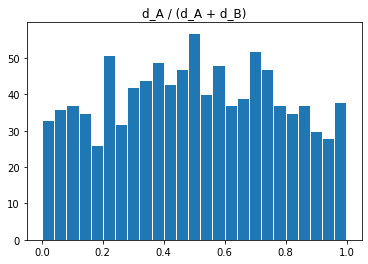

In [8]:
ratio = []

ct = 0

for i in range(1000):

  rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
  vals = config3_0v2(rv)[0]
  valid = False
  while True:
    if vals[0] < 0 or vals[1] < 0 or vals[2] < 0: # negative parameters
      rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
      vals = config3_0v2(rv)[0]
      ct += 1
      continue
    if np.sqrt(vals[0]*vals[1]/vals[2]) > 1: # θ_A
      rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
      vals = config3_0v2(rv)[0]
      ct += 1
      continue
    if np.sqrt(vals[0]*vals[2]/vals[1]) > 1: # θ_B
      rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
      vals = config3_0v2(rv)[0]
      ct += 1
      continue
    break
    
  # computing θ_A and θ_B
  T_A = np.sqrt(vals[0]*vals[1]/vals[2])
  T_B = np.sqrt(vals[0]*vals[2]/vals[1])

  # computing d_A and d_B
  d_A = -0.5 * np.log(T_A)
  d_B = -0.5 * np.log(T_B)

  ratio.append(d_A / (d_A + d_B))

print("Samples thrown out: ", ct) # cases thrown out
plt.hist(ratio, bins = 25, edgecolor = 'white')
plt.title('d_A / (d_A + d_B)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


Samples thrown out:  1717


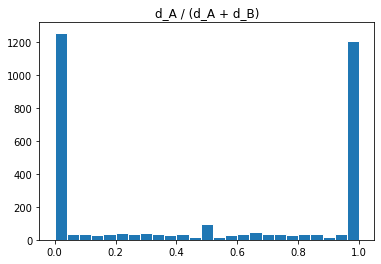

In [6]:
ratio = []

ct = 0

for i in range(5000):

  rv = np.random.multivariate_normal(mean, cov).reshape((8, 1))
  rv = rv.astype(int)
  a, b, c = min_nll(rv)
  if a != 0:
    ratio.append(c)
  else:
    ct += 1

print("Samples thrown out: ", ct) # cases thrown out
plt.hist(ratio, bins = 25, edgecolor = 'white')
plt.title('d_A / (d_A + d_B)')
plt.show()